<h1 style='color: #6a5acd; font-size: 34px; font-weight: bold;'>Exploração Biblioteca UFRN

</h1>


# <font color="#cda35a" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #cda35a;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b> Explorar dos dados da biblioteca da UFRN, e responder algumas preguntas, como: A quantidade de empréstimos está aumentando ou diminuindo ao decorrer dos últimos anos? Em quais bibliotecas do sistema estão a maior quantidade de empréstimos?
Quais são os temas mais emprestados? E os menos? _______ e indentificar possíveis problemas e soluções </b></i>     
</p>

---

# <font color="#cda35a" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #cda35a;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Importação de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Limpeza de dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Análise exploratória de dados e DateTime
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. Análise exploratória de dados e Variáveis categóricas
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
5. Análise exploratória de dados e Boxplot
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
6. JSON, Excel e Pivot_table
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
7. Customização de tabelas
</h1>

---

# <font color="#cda35a" style="font-size: 30px;">1. Importação de dados</font>
<hr style="border: 2px solid #cda35a;">

---
## <font color=#5abdcd style="font-size: 30px;">Unificar todos os arquivos em um único Dataframe</font>

---

In [180]:
#importando bibliotecas

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [181]:
# Lista para armazenar os caminhos dos arquivos CSV
file_paths = [
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20101.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20102.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20111.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20112.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20121.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20122.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20131.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20132.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20141.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20142.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20151.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20152.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20161.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20162.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20171.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20172.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20181.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20182.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20191.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20192.csv"),
    os.path.join("Datasets", "dados_emprestimos", "emprestimos-20201.csv")
]


# Lista para armazenar os DataFrames de cada arquivo
data_frames = []

# Iterar sobre os caminhos dos arquivos CSV
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

# Concatenar os DataFrames em um único DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

In [182]:
df_parquet = pd.read_parquet(os.path.join("Datasets", "dados_exemplares.parquet"))
df = combined_df.merge(df_parquet, on="codigo_barras", how="left")
df.head(3)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0


---
## <font color=#5abdcd style="font-size: 30px;">Limpando dados Nulos e Duplicatas</font>

---

In [183]:
# Remover linhas com valores ausentes
df.dropna(inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# <font color="#cda35a" style="font-size: 30px;">2. Limpeza de dados</font>
<hr style="border: 2px solid #cda35a;">

In [184]:
intervalos = {
    (0, 100): 'Generalidades',
    (100, 200): 'Filosofia e psicologia',
    (200, 300): 'Religião',
    (300, 400): 'Ciências sociais',
    (400, 500): 'Classe vaga',
    (500, 600): 'Matemática e ciências naturais',
    (600, 700): 'Ciências aplicadas',
    (700, 800): 'Belas artes',
    (800, 900): 'Linguagem',
    (900, float('inf')): 'Geografia. Biografia. História.'
}

CDU_lista = []
for CDU in df['localizacao']:
    categoria = next(value for (key_start, key_end), value in intervalos.items() if CDU >= key_start and CDU < key_end)
    CDU_lista.append(categoria)

df['CDU_geral'] = CDU_lista

In [185]:
df.drop(columns=['registro_sistema'],inplace=True)
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('string')

# <font color="#cda35a" style="font-size: 30px;">3. Análise exploratória de dados e DateTime </font>
<hr style="border: 2px solid #cda35a;">

In [186]:
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])

In [187]:
df['Ano_Emprestimo'] = df['data_emprestimo'].dt.year.astype(int)

total_por_ano = []
for ano in list(df['Ano_Emprestimo'].unique()):
    total = df.query("Ano_Emprestimo == @ano")['id_exemplar'].count()
    total_por_ano.append(total)
total_por_ano

[71336, 93768, 103915, 105416, 94177, 85409, 94921, 94080, 81853, 74149, 7388]

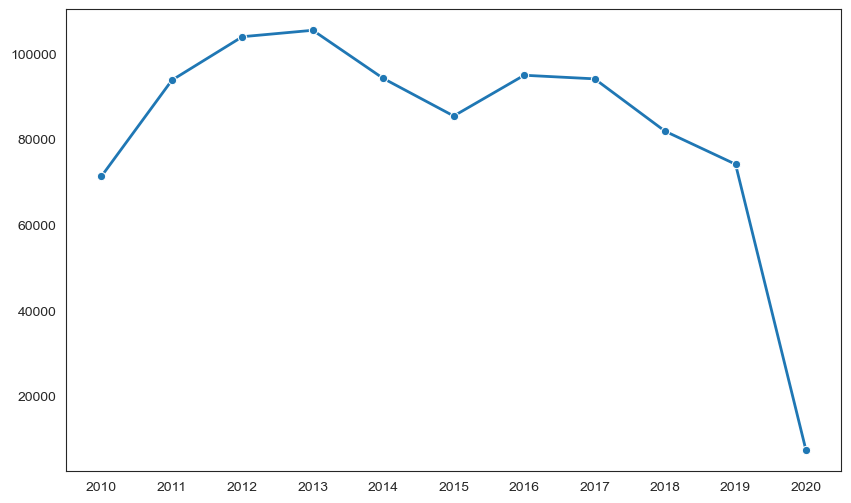

In [202]:
#Plotando o Gráfico

anos = list(df['Ano_Emprestimo'].unique())

# Remover Bordas 
sns.set_style("white")


plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=anos, y=total_por_ano, lw=2, marker='o')

# Label x
plt.xticks(anos)



plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">Houve uma grande queda no ano da pandemia</font>
### <font color=#5abdcd style="font-size: 30px;">declínio de 2013 a 2015</font>
### <font color=#5abdcd style="font-size: 30px;">depois de um avanço em 2015 voltou a cair</font>

---

In [189]:
#separando os meses
df['mes_emprestimo'] = df['data_emprestimo'].dt.month.astype(int)

#contando quantos empréstimos por mês
filmes_por_mes = df.groupby('mes_emprestimo')['id_exemplar'].count()


# Renomeando os meses
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
filmes_por_mes.index = filmes_por_mes.index.map(dicionario_meses)

filmes_por_mes = filmes_por_mes.to_frame()
filmes_por_mes.index.name = 'mes'
filmes_por_mes.columns = ['quantidade']
filmes_por_mes

,quantidade
mes,
Jan,36231
Fev,109353
Mar,108625
Abr,91686
Mai,81520
Jun,44944
Jul,64493
Ago,111095
Set,93015


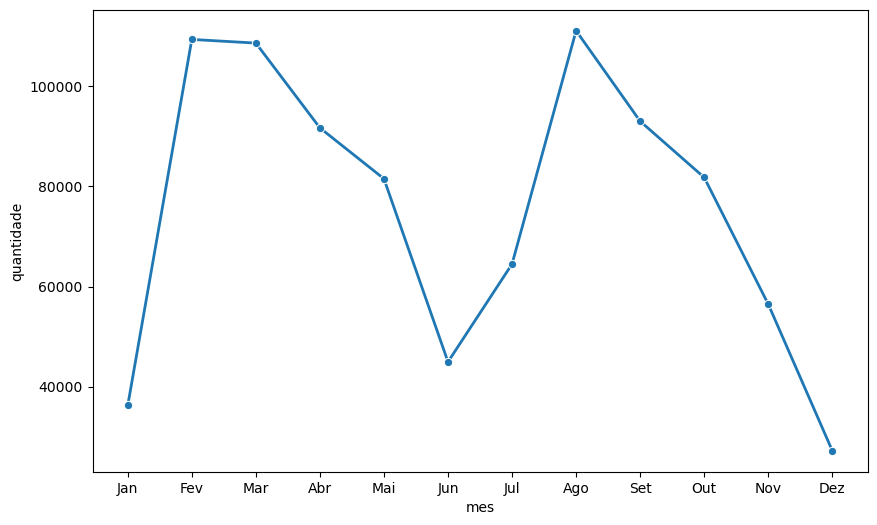

In [190]:
#Plotando o Gráfico

anos = list(df['Ano_Emprestimo'].unique())

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=filmes_por_mes.index, y=filmes_por_mes['quantidade'], lw=2, marker='o')

plt.show()

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


### <font color=#5abdcd style="font-size: 30px;">os meses de Janeiro, Junho e Dezembro são os menos movimentados, normalmente meses de férias</font>
### <font color=#5abdcd style="font-size: 30px;">meses mais ativos (fevereiro e agosto)</font>
### <font color=#5abdcd style="font-size: 30px;">no meses de pouco movimento pode-ser incluir férias para a maioria dos colaboradores.</font>

---

In [191]:
#separando os horários
df['hora_emprestimo'] = df['data_emprestimo'].dt.hour.astype(int)

#contando quantos empréstimos por hora
filmes_por_hora = df.groupby('hora_emprestimo')['id_exemplar'].count()

# Tabela com o movimento em cada horário 
filmes_por_hora = filmes_por_hora.to_frame()
filmes_por_hora.index.name = 'Hora'
filmes_por_hora.columns = ['quantidade']
filmes_por_hora.sort_values(by='quantidade', ascending=False)

,quantidade
Hora,
16,92822
17,82122
18,81939
10,81028
11,77772
15,72048
12,66460
14,66175
20,57247


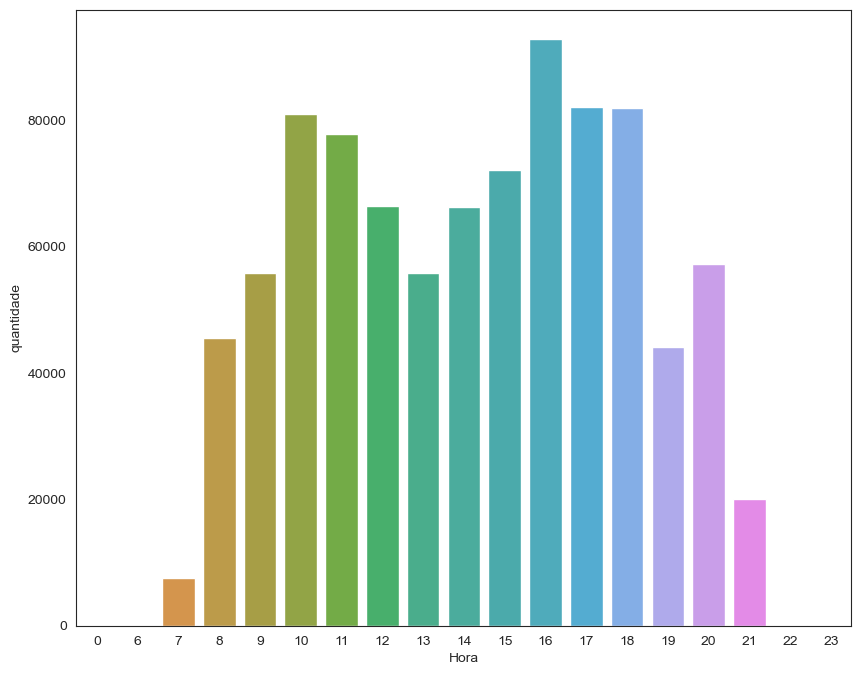

In [222]:
#plotando gráfico de barras

plt.figure(figsize=(10,8))

ax = sns.barplot(x= filmes_por_hora.index, y =filmes_por_hora['quantidade'])

---
# <font color=#5abdcd style="font-size: 30px;">Análise do Gráfico</font>
<hr style="border: 2px solid #5abdcd;">


## <font color=#5abdcd style="font-size: 30px;">quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário:</font>
# > <font color=#5abdcd style="font-size: 30px;">Até as 7 horas da manhã o movimento é baixo.</font>
# > <font color=#5abdcd style="font-size: 30px;">Das 21 horas em diante.</font>

---